<a href="https://colab.research.google.com/github/aleja909/CD_202202_ALEJANDRA_GIRALDO/blob/main/Proyectokripley_U00125762.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **La Función K de Ripley**
La función K, propuesta por Brian D. Ripley en 1976, representa la media observada del número de puntos dentro de una distancia definida dividida por la densidad de puntos en el área de estudio.

La forma general de la función K está dada por la ecuación:

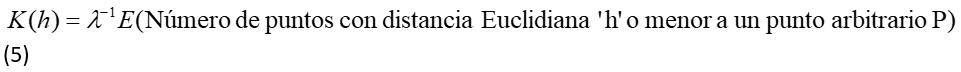

Donde λ es la densidad de puntos en el área. El valor de la función K para un fenómeno aleatoriamente distribuido es igual a πh^2.

Para estimar el valor de la función K se parte del valor estimado de E, denominado operador de expectación, que para espacios planos se estima mediante la ecuación:

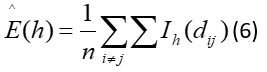

Donde h es la distancia máxima entre los puntos a ser tomada en consideración, n es el número total de puntos, dij es la distancia euclidiana entre dos puntos i y j, Ih() es una función de peso con valor uno (1) cuando la distancia entre los puntos es menor o igual a h y valor cero (0) cuando esta distancia es superior a h y R es el área del espacio estudiado. La densidad de puntos λ se puede estimar como:

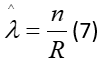

Al remplazar las funciones (6) y (7) sobre la función (5) se obtiene el estimador de la función K para espacios planos dado por la ecuación:

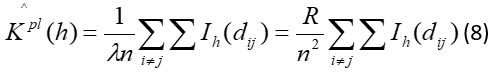

La siguiente figura muestra las distancias dij menores o iguales a h para dos puntos arbitrarios dentro del área de estudio.

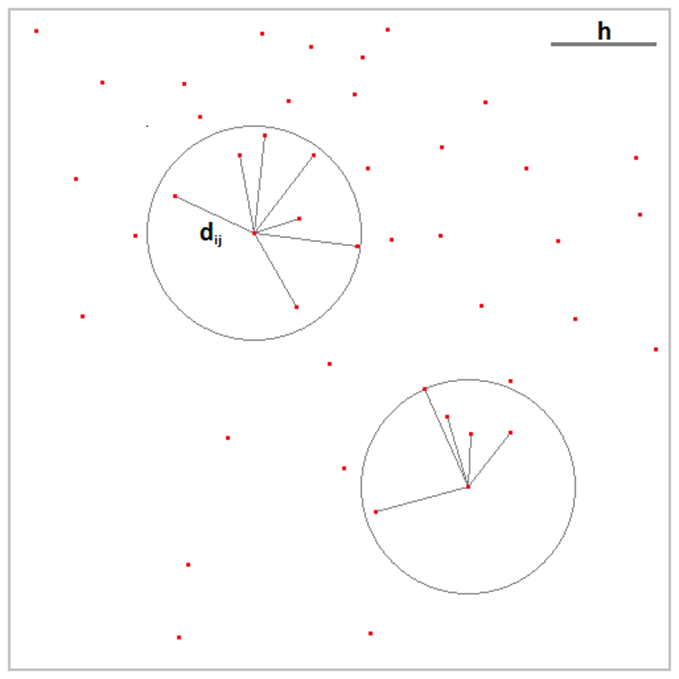

La función K puede ser utilizada para determinar si una serie de puntos ubicados sobre un espacio tienden a formar grupos o por el contrario se distribuye de forma aleatoria; una forma de poner a prueba estas afirmaciones es por medio de simulaciones de Monte Carlo. Para esto se genera una gran cantidad de conjuntos aleatorios de puntos sobre el mismo espacio (por ejemplo 1.000 conjuntos), la función K se aplica con diferentes valores de h (distancia máxima entre puntos a tenerse en cuenta) sobre cada uno de los conjuntos de datos aleatorios generados y sobre el conjunto original de puntos. Con los resultados de la función K sobre los conjuntos aleatorios para cada valor de h se definen intervalos de confianza, por ejemplo del 95% (entre el valor que ocupa el percentil 2,5 y el valor que ocupa el percentil 97,5), si el valor de la función K para el conjunto de datos original es superior al intervalo de confianza definido se puede concluir que existe tendencia estadísticamente significativa a formar agrupaciones y por lo tanto la distribución de los datos sobre el espacio no es aleatoria.

In [1]:
pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.3 MB 7.8 MB/s 


In [ ]:
pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 6.9 MB/s 


In [ ]:
!pip uninstall -y shapely 
!pip install shapely --no-binary shapely

In [ ]:
pip install geopandas

In [ ]:
pip install earthpy

In [ ]:
import pandas as pd
import pyproj
import sys
import urllib
import cartopy.io.shapereader as shapereader
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd
import pandas as pd
import earthpy as et
import shapely
import random
from shapely.geometry.polygon import Point

In [ ]:
ruta = 'https://foscalinternacional.com/datasets/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df

In [ ]:
#Creación de la proyección
P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [ ]:
#Se convertirán las coordenadas geográficas a UTM
df['x'], df['y'] = P(df['longitud'], df['latitud'])
df

In [ ]:
def calcularDistancia(x1,y1,x2,y2):
  distancia=((x1-x2)**2+(y1-y2)**2)**(1/2)
  return distancia

In [ ]:
#Función K de Ripley
h=100
listaPuntos = []
for i in range(df.shape[0]):
  listaPuntos.append((df['x'][i], df['y'][i]))

  

contador=0
for i in range(len(listaPuntos)):
  x1= listaPuntos[i][0]
  y1= listaPuntos[i][1]
  for j in range(i+1, len(listaPuntos)):
    x2= listaPuntos[j][0]
    y2= listaPuntos[j][1]
    if (calcularDistancia(x1,y1,x2,y2)<=h):
      contador+=1
contador

In [ ]:
#se carga la cartografia de Floridablanca
url='https://foscal.net/cartografia/'

file_list=["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.qmd","68276_urbano.shp", "68276_urbano.shx"]
for file in file_list:
    urllib.request.urlretrieve(url+file,file)  

In [ ]:
fp=r"68276_urbano.shp"
data= gpd.read_file(fp)
data_copy=data.copy()
crs=pyproj.CRS(proj='utm', zone=18, ellps='WGS84')
data_copy=data_copy.to_crs(crs)
data['poly_area']=data_copy['geometry'].area
area=float(data['poly_area'])
area


In [ ]:
#Mapa de Floridablanca
x_min=-73.1325 #lower_lon
x_max=-73.0732 #upper_lon
y_min=7.053 #lower_lat
y_max=7.0993 #upper_lat

In [ ]:
def funcionK(listaPuntos, area, h):
  #Calculando el valor estimado de k
  contK=0
  for i in range(len(listaPuntos)-1):
    for j in range(i+1,len(listaPuntos)-1):
      if calcularDistancia(listaPuntos[i][0],listaPuntos[i][1],listaPuntos[j][0],listaPuntos[j][1])<=h:
        contK+=1
  valorK=contK*area/len(listaPuntos)**2
  return valorK

In [ ]:
listaPuntos=[]
for i in range(df.shape[0]):
  listaPuntos.append((df['x'][1],df['y'][1]))
len(listaPuntos)

In [ ]:
contK=funcionK(listaPuntos,area,h)
contK

In [ ]:
poligono=data['geometry'][0]
listak=[]
for i in range (1):
  listaAux=[]
  contAux=0
  while contAux < len(listaPuntos):
    tuplaAux=(random.random()*(x_max-x_min)+x_min, random.random()*(y_max-y_min)+y_min)
    puntoAux=Point(tuplaAux)
  
    if puntoAux.within(poligono):
      listaAux.append(tuplaAux)
      contAux+=1


    listak.append(funcionK(listaAux,area,h))



In [ ]:
(listaAux.shape[0])




In [ ]:
subplot_kw=dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=subplot_kw)


ax.set_extent([x_min, x_max, y_min, y_max])

reader=shapereader.Reader('68276_urbano.shp')
#se dibuja el mapa
for manzana in reader.geometries():
  ax.add_geometries([manzana], ccrs.PlateCarree(), facecolor='White', edgecolor='gray')
#aquí se agregan los puntos
ax.scatter(listaAux, listaAux, zorder=10, c='b', s=10)
ax.add_line
plt.show()  